#Importing and installing

In [1]:
#Pip install required

!pip install datasets
!pip install transformers datasets evaluate
!pip install --upgrade torch torchvision torchaudio
!python -m spacy download en_core_web_lg
!pip install --upgrade torch torchvision torchaudio
!pip install --upgrade evaluate datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [2]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import csv
from sklearn.manifold import TSNE
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

nlp = spacy.load('en_core_web_lg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Preprocessing and Cleaning

In [3]:
# Load Dataset
dataset = load_dataset("yelp_review_full")

# Create train Dataset
df = pd.DataFrame(dataset['train'])
display(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...


In [5]:
#Create function to generally clean text
def clean_text(text):
    text = text.lower()  # lowercase words
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)  # Remove mentions
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)  # Remove hashtags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r"\s+", " ", text)  #Uniform spaces
    text = text.strip()
    return text

#Create function to remove stop words
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

#Lemmatize words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

#Apply cleaning

df['clean_text'] = df['text'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df['clean_text'] = df['clean_text'].apply(lemmatize_text)
print("\Cleaned Words")

#Print head to confirm cleaning
display(df[['text', 'clean_text']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


\Cleaned Words


,text,clean_text
0,dr. goldberg offers everything i look for in a...,dr goldberg offer everything look general prac...
1,"Unfortunately, the frustration of being Dr. Go...",unfortunately frustration dr goldberg patient ...
2,Been going to Dr. Goldberg for over 10 years. ...,going dr goldberg year think one st patient st...
3,Got a letter in the mail last week that said D...,got letter mail last week said dr goldberg mov...
4,I don't know what Dr. Goldberg was like before...,dont know dr goldberg like moving arizona let ...


In [8]:
label_counts = df_sample['label'].value_counts()
print(label_counts)

null_values = df_sample.isnull().sum()
print(null_values)

label
1    2050
3    2009
4    1986
2    1980
0    1975
Name: count, dtype: int64
label          0
text           0
clean_text     0
text_length    0
dtype: int64


In [6]:
#Create subset to speed up data
df_sample = df.sample(10000, random_state=42).reset_index(drop=True)

In [9]:
#Cleaning test dataset as well

df_test = pd.DataFrame(dataset['test'])
df_test['clean_text'] = df_test['text'].apply(clean_text)
df_test['clean_text'] = df_test['clean_text'].apply(remove_stopwords)
df_test['clean_text'] = df_test['clean_text'].apply(lemmatize_text)

#Print cleaned data
display(df_test[['text', 'clean_text']].head())

,text,clean_text
0,I got 'new' tires from them and within two wee...,got new tire within two week got flat took car...
1,Don't waste your time. We had two different p...,dont waste time two different people come hous...
2,All I can say is the worst! We were the only 2...,say worst people place lunch place freezing lo...
3,I have been to this restaurant twice and was d...,restaurant twice disappointed time wont go bac...
4,Food was NOT GOOD at all! My husband & I ate h...,food good husband ate couple week ago first ti...


#EDA

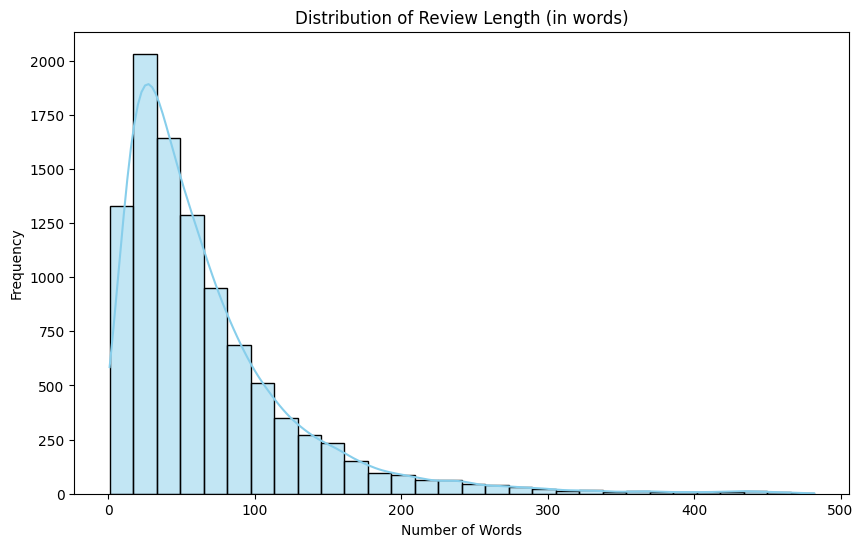

<ipython-input-7-1c4ec92246e3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_df, palette='viridis')


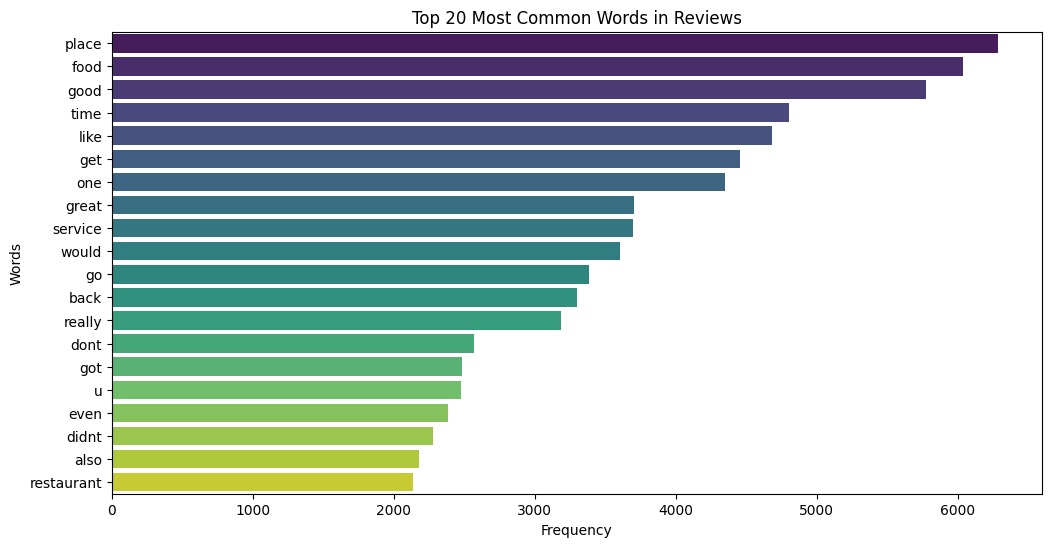

<Axes: title={'center': 'Label Distribution (Yelp)'}, xlabel='label'>

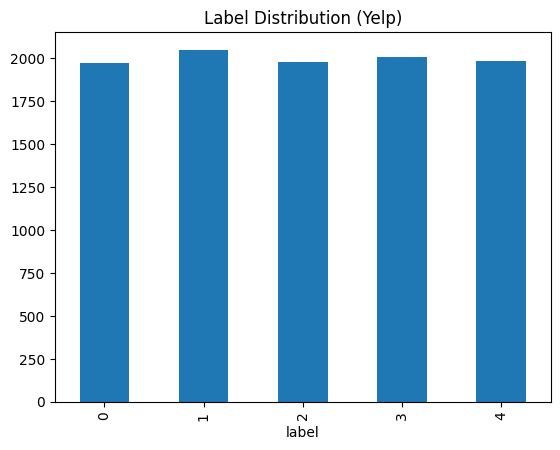

In [7]:
# Review length distribution
df_sample['text_length'] = df_sample['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Review Length (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

#Show most common words
all_words = " ".join(df_sample['clean_text']).split()
most_common = Counter(all_words).most_common(20)
common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_df, palette='viridis')
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()



#Creating EDA to confirm distribution of labels
df_sample['label'].value_counts().sort_index().plot(kind='bar', title='Label Distribution (Yelp)')